In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

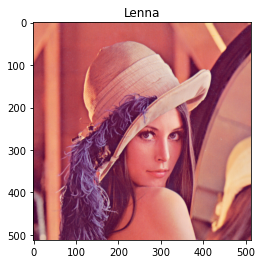

In [2]:
image_path = "Images/Lenna.png"
image = cv.imread(image_path)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Lenna")
plt.show()

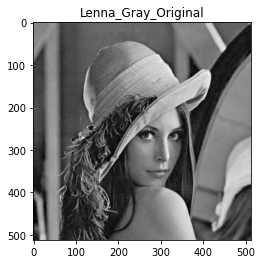

In [3]:
gray_image = cv.cvtColor(image_rgb, cv.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap='gray')
plt.title("Lenna_Gray_Original")
plt.show()

## Translation

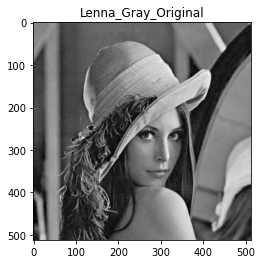

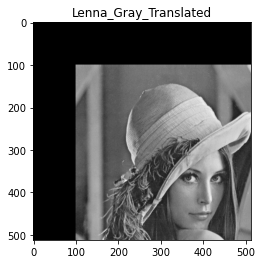

In [4]:
def translate_image(gray_image, delta_x, delta_y):
    h, w = gray_image.shape[:2]
    t_image = np.zeros_like(gray_image)

    # Iterate over each pixel
    for y in range(h):
        for x in range(w):
            x_dash = x + delta_x
            y_dash = y + delta_y

            if 0 <= x_dash < w and 0 <= y_dash < h:
                t_image[y_dash, x_dash] = gray_image[y, x]

    return t_image

delta_x = 100
delta_y = 100

translated_image = translate_image(gray_image, delta_x, delta_y)

plt.imshow(gray_image,cmap='gray')
plt.title("Lenna_Gray_Original")
plt.show()

plt.imshow(translated_image,cmap='gray')
plt.title("Lenna_Gray_Translated")
plt.show()

## Scaling

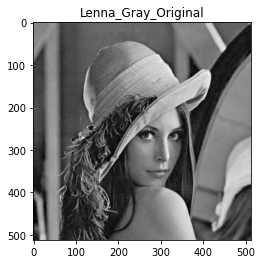

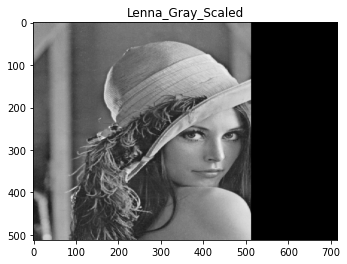

In [19]:
def scale_image(gray_image, scale_x, scale_y):
    h, w = gray_image.shape[:2]
    h_dash = int(h * scale_y)
    w_dash = int(w * scale_x)
    s_image = np.zeros((h_dash,w_dash), dtype=np.uint8)

    # Iterate over each pixel
    for y2 in range(h_dash):
        for x2 in range(w_dash):
            x1 = int(x2 / scale_x)
            y1 = int(y2 / scale_y)
            
            if 0 <= x1 < w  and 0 <= x2 < h :
                s_image[y2, x2] = gray_image[y1, x1]

    return s_image



scale_x = 1.4
scale_y = 1

scaled_image = scale_image(gray_image, scale_x, scale_y)

plt.imshow(gray_image, cmap='gray')
plt.title("Lenna_Gray_Original")
plt.show()

plt.imshow(scaled_image, cmap='gray')
plt.title("Lenna_Gray_Scaled")

plt.show()

## Shearing in x-direction

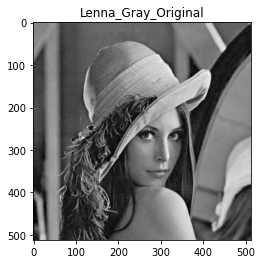

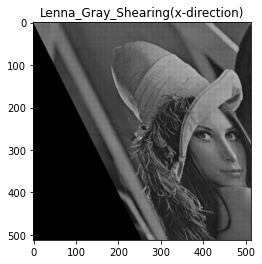

In [5]:
def shear_x_direction(img, shear_value):
    h, w = img.shape[:2]
    
    s_image = np.zeros_like(img)

    # Iterate over each pixel
    for y in range(h):
        for x in range(w):
            x_dash = int(np.round(float(x + shear_value * y)))
            y_dash = y

            if 0 <= x_dash < w and 0 <= y_dash < h:
                s_image[y_dash, x_dash] = img[y, x]

    return s_image

s = 0.5
sheared_image = shear_x_direction(gray_image, s)

plt.imshow(gray_image,cmap='gray')
plt.title("Lenna_Gray_Original")
plt.show()

plt.imshow(sheared_image,cmap='gray')
plt.title("Lenna_Gray_Shearing(x-direction)")
plt.show()

## Shearing in y-direction

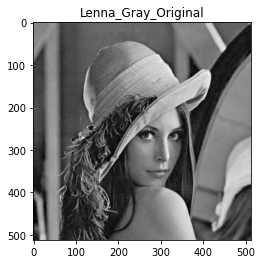

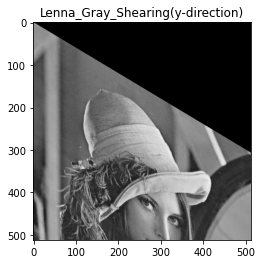

In [6]:
def shear_y_direction(img, shear_value):
    h, w = img.shape[:2]
    
    # Create image to store sheared image
    s_image = np.zeros_like(img)

    # Iterate over each pixel
    for y in range(h):
        for x in range(w):
            x_dash = x
            y_dash = int(np.round(float(y + shear_value * x)))

            if 0 <= x_dash < w and 0 <= y_dash < h:
                s_image[y_dash, x_dash] = img[y, x]

    return s_image

s = 0.6
sheared_image = shear_y_direction(gray_image, s)

plt.imshow(gray_image,cmap='gray')
plt.title("Lenna_Gray_Original")
plt.show()

plt.imshow(sheared_image,cmap='gray')
plt.title("Lenna_Gray_Shearing(y-direction)")
plt.show()

 ## Rotation

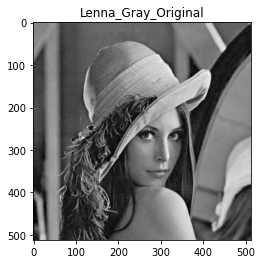

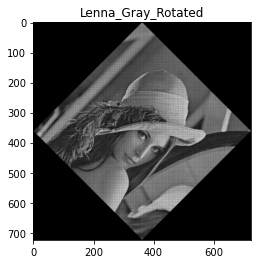

In [8]:
def rotation(img, angle):
    h, w = img.shape[:2]
    cx, cy = (w // 2, h // 2)  # center of image
    rads = math.radians(angle)
    
    x_dash = round(abs(w * math.cos(rads)) + abs(h * math.sin(rads)))
    y_dash = round(abs(h * math.cos(rads)) + abs(w * math.sin(rads)))
    r_image = np.zeros((y_dash, x_dash))

    midx, midy = (x_dash // 2, y_dash // 2)  # center of r_image

    for y in range(h):
        for x in range(w):
            #  rotated coordinates
            x_rot = int((x - cx) * math.cos(rads) - (y - cy) * math.sin(rads)) + midx
            y_rot = int((x - cx) * math.sin(rads) + (y - cy) * math.cos(rads)) + midy

            # boundary conditions
            if 0 <= x_rot < x_dash and 0 <= y_rot < y_dash:
                r_image[y_rot, x_rot] = img[y, x]

    return r_image

angle = 45

rotated_image = rotation(gray_image, angle)

plt.imshow(gray_image,cmap='gray')
plt.title("Lenna_Gray_Original")
plt.show()

plt.imshow(rotated_image,cmap='gray')
plt.title("Lenna_Gray_Rotated")
plt.show()